In [1]:
import OpenBlender
import pandas as pd
import json
import seaborn as sns
from sklearn.metrics import confusion_matrix
from sklearn import datasets
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
import numpy as np
import matplotlib.colors as colors
from mpl_toolkits.mplot3d import Axes3D
from mpl_toolkits import mplot3d
from sklearn import linear_model, datasets
import itertools
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_auc_score
from sklearn import metrics
import warnings
warnings.filterwarnings('ignore')
plt.rcParams['figure.figsize'] = (20, 10)

/Users/jeroaranda/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/weight_boosting.py:29: DeprecationWarning: numpy.core.umath_tests is an internal NumPy module and should not be imported. It will be removed in a future NumPy release.
  from numpy.core.umath_tests import inner1d


In [12]:
import os
os.listdir()
fig = ax.get_figure()
fig.savefig('test.png')

['1990.csv',
 'EXAMEN150344.pdf',
 'mundo-95(paraR).csv',
 'myfile3.tsv',
 'BREXIT.csv',
 'indice_marginacion.csv',
 'clinton (etiquetas).xls',
 'myfile2.tsv',
 'bitcoin_predictor_entregable.slides.html',
 'fox_btc.csv',
 '.DS_Store',
 'marginacion.ipynb',
 'EXAMEN150344.ipynb',
 'Regresión Logistica.md',
 'EXAMEN150344.html',
 'portada.png',
 'titanic3.xls',
 'winequality-red.csv',
 'clusters.ipynb',
 'myfile4.txt',
 'BREXIT1.xlsx',
 'bitcoin_predictor_entregable.ipynb',
 'Datos para Regresion.xlsx',
 'RESPUESTAS150344.html',
 'localidades(urban0-rurales).csv',
 'desaparicion_forzada-2.html',
 'ingreso.ipynb',
 'BREXIT.sav',
 'datos.csv',
 'bif_btc.csv',
 'proyecto_final.slides.html',
 'myfile.tsv',
 'viviendas.csv',
 'Examen 1 Aplicada 3 preguntas.docx',
 'Datos para Regresion.csv',
 'bitcoin_predictor.ipynb',
 'examenprep.ipynb',
 '.ipynb_checkpoints',
 'localidades(urban0-rurales).xlsx',
 'desaparicion_forzada.ipynb',
 'proyecto_final.slides-2.html',
 '.git',
 'Diccionario_mun (1).


<center><h1>¿Qué mueve a Bitcoin?</h1></center>

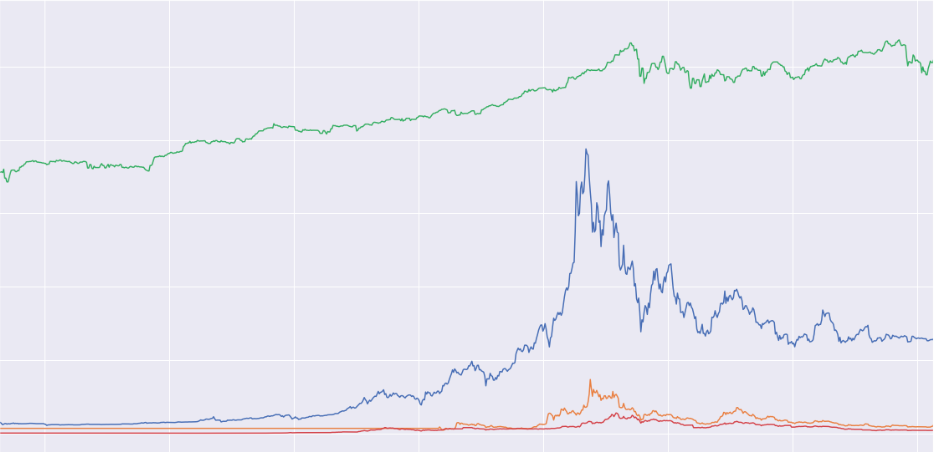

<center>
<h5>Pablo Garza</h5>
    
<h5>Jerónimo Aranda</h5>
</center>

<center><h3>Outline</h3></center>




<H2>
<ul>
  <li>Introducción</li>
   <br> 
    <br>
  <li>Exploración de los datos</li>
  <br>
    <br>
  <li>Modelos predictivos</li>
  <br> <br>
  <li>Simulación de portafolios</li>
  <br> <br>
  <li>Conclusiones</li>
    
</ul>
</H2>

<center><h2>Introducción</h2></center>


El Bitcoin es una **criptomoneda** descentralizada sin un administrador o banco central. Fue creada en 2008 por un usuario desconocido llamado **"Satoshi Nakamoto"**. Se puede adquirir Bitcoin a través de **"minarlos"** o por una compraventa directa entre usuarios, pero el precio no depende de un subyacente o de algún valor intrínseco, el precio se determina por **oferta** y **demanda**.



<center><b>Hipótesis de trabajo</b>: ¿Se puede predecir el movimiento del Bitcoin a través del análisis de noticias?</center>
<br><br>

Se usarán conceptos de procesamiento de lenguaje natural (**NLP**) cómo **n-gramas** y **vectorizadores de texto**.

Además se aplicará **PCA** y modelos de clasificación binaria.

Finalmente, además de realizar una predicción sobre el movimiento observamos cuál hubiera sido la **evolución** de un Capital de MXN$ 100,000 sobre una posición dinámica en Bitcoin.

<center><h3>Exploración de los datos</h3></center>

Veamos los datos crudos:

In [ ]:
action = 'API_createTextVectorizer'
vectorizer_parameters = {
    'token' : 'mXeqSpttQZQkw0wDluRYSTE6cAwFDQ',
    'id_user' : '5d0831653e59b27a93e43be9',
    'name' : 'Reuters Technology News',
    'anchor':{'id_dataset' : '5d5718ef9516293a12ad4f47', 'include_features' : ['title']},
    'ngram_range' : {'min' : 1, 'max' : 2},
    'language' : 'en',
    'remove_stop_words' : 'on',
    'min_count_limit' : 2
}
res = OpenBlender.call(action, vectorizer_parameters)

In [ ]:
parameters = { 
   'token':'mXeqSpttQZQkw0wDluRYSTE6cAwFDQ',
   'id_user':'5d0831653e59b27a93e43be9',
   'id_dataset':'5d4c3af79516290b01c83f51',
   'target_threshold' : {'feature':'change','success_thr_over':0},
   'lag_target_feature' : {'feature':'change_over_0', 'periods':1},
   'blends':[{'id_blend':'5de020789516293a833f5818',
               'blend_type' : 'text_ts',
               'restriction' : 'predictive',
               'blend_class' : 'closest_observation', 
               'specifications':{'time_interval_size' : 3600*12 }}],
   'date_filter':{'start_date':'2019-08-20T16:59:35.825Z',
                   'end_date':'2019-11-04T17:59:35.825Z'},
   'drop_non_numeric' : 1
}

In [ ]:
def pullObservationsToDF(parameters):
    action = 'API_getObservationsFromDataset'
    df = pd.read_json(json.dumps(OpenBlender.call(action,parameters)['sample'])
                      ,convert_dates=False,convert_axes=False).sort_values('timestamp', ascending=False)
    df.reset_index(drop=True, inplace=True)
    return df
df = pullObservationsToDF(parameters)

In [43]:
df=df.dropna()
periodico=0
cols=df.columns
df.rename(columns = {'TARGET_change_over_0':'Positive change (open vs. price)'}, inplace = True)
df[df.columns[1:]].head(6)

,FOX_BUSINESS_TEXTVEC_100,FOX_BUSINESS_TEXTVEC_100m,FOX_BUSINESS_TEXTVEC_100m pledge,FOX_BUSINESS_TEXTVEC_10b,FOX_BUSINESS_TEXTVEC_10k,FOX_BUSINESS_TEXTVEC_10k moving,FOX_BUSINESS_TEXTVEC_11,FOX_BUSINESS_TEXTVEC_115000,FOX_BUSINESS_TEXTVEC_115000 pounds,FOX_BUSINESS_TEXTVEC_115m,...,FOX_BUSINESS_TEXTVEC_zuckerberg,FOX_BUSINESS_TEXTVEC_zuckerberg sandberg,FOX_BUSINESS_TEXTVEC_zuckerbergs,Positive change (open vs. price),high,ind,low,open,price,timestamp
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0,8536.8,18.0,8119.0,8536.7,8219.5,1.574096e+09
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0,8553.1,17.0,8442.7,8494.8,8523.5,1.573924e+09
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1,8817.4,16.0,8601.4,8800.9,8655.7,1.573751e+09
3,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0,8849.3,15.0,8730.3,8830.0,8801.1,1.573664e+09
4,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0,9107.3,14.0,8633.4,9069.7,8737.7,1.573492e+09
5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0,8891.4,13.0,8735.9,8782.3,8828.0,1.573319e+09


Nuestra base de datos tiene las siguientes dimensiones:

In [37]:
df[df.columns[1:]].shape

(67, 2961)

Es decir **67** observaciones para **2961** columnas.

<center><h3>Para entender mejor veámoslos gráficamente:</h3></center>

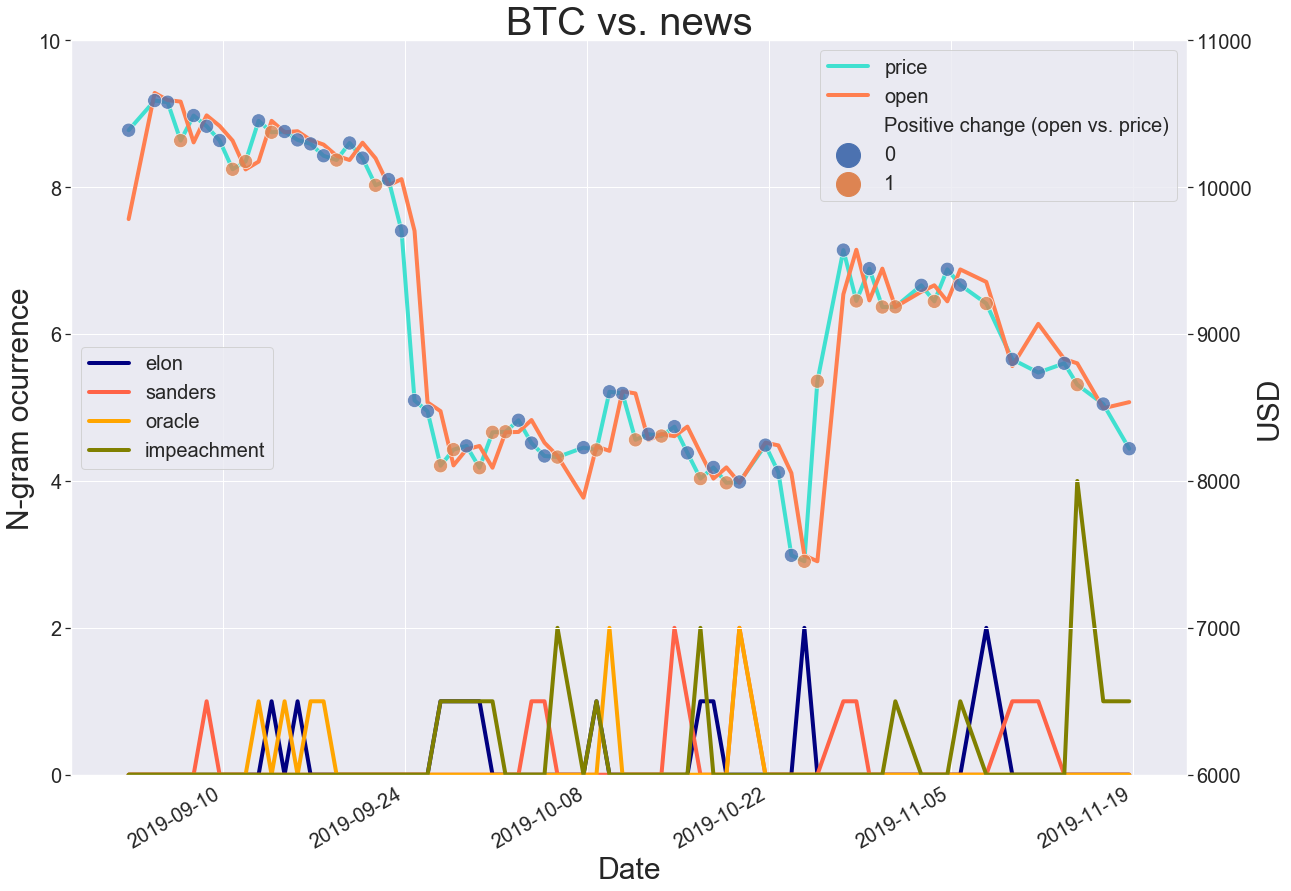

In [38]:
df['date'] = pd.to_datetime(df['timestamp'],unit='s')
df['elon']=df['FOX_BUSINESS_TEXTVEC_elon']
df['sanders']=df['FOX_BUSINESS_TEXTVEC_sanders']
df['oracle']=df['FOX_BUSINESS_TEXTVEC_oracle']
df['impeachment']=df['FOX_BUSINESS_TEXTVEC_impeachment']
plt.rcParams['figure.figsize'] = (20, 15)
fig,ax=plt.subplots()


sns.set()
sns.set( rc={"lines.linewidth": 4})


ax.set_title('BTC vs. news',size=40)

ax = df.plot(x='date',y=['elon','sanders','oracle','impeachment'],logy=False,color=['navy','tomato','orange','olive'],ax=ax,zorder=20)


ax.set_ylim([0,10])
ax.set_ylabel('N-gram ocurrence', size = 30)
ax.set_xlabel('Date', size = 30)
for tick in ax.xaxis.get_major_ticks():
    tick.label.set_fontsize(20) 

a=plt.legend(prop={'size':20},loc='center left')


ax2 = ax.twinx()
ax2=df.plot(x='date',y=['price','open'],logy=False,color=['turquoise','coral'],ax=ax2,zorder=20)
ax2=sns.scatterplot(x='date',y='price',hue='Positive change (open vs. price)',data=df,s=200,zorder=30,alpha=.8,)


ax2.set_ylabel('USD', size = 30)



a=plt.legend(prop={'size':20},loc='upper right',markerscale=4)

for tick in ax.yaxis.get_major_ticks():
    tick.label.set_fontsize(20)

a=ax2.set_ylim([6000, 11000])
plt.yticks(fontsize = 20)
p=plt.show()

<center><h3>Entendiendo los encabezados:</h3></center>

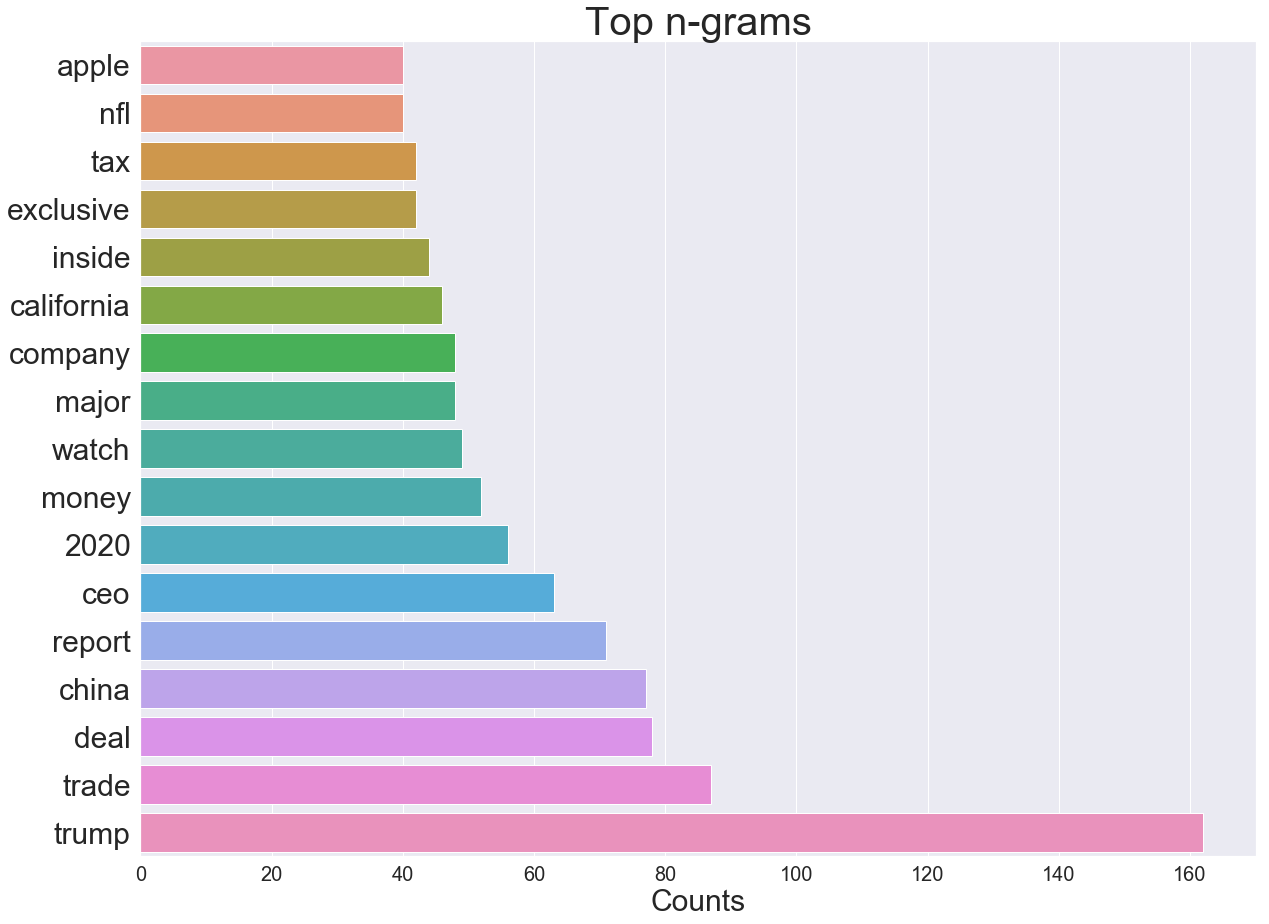

In [39]:
sums=df[cols[:-7]].dropna().sum().sort_values()
periodicos=['FOX_BUSINESS_TEXTVEC_','BUSINESS_INSIDER_FIN_']
col_names=[name.replace(periodicos[periodico],'') for name in sums.index[-20:-3]]
ax=sns.barplot(y=col_names, x=sums[-20:-3])
ax.set_title('Top n-grams',size=40)
ax.set_xlabel('Counts',size=30)
for tick in ax.yaxis.get_major_ticks():
    tick.label.set_fontsize(30)
for tick in ax.xaxis.get_major_ticks():
    tick.label.set_fontsize(20)
sns.set()

<center><h3>Correlaciones</h3><center>

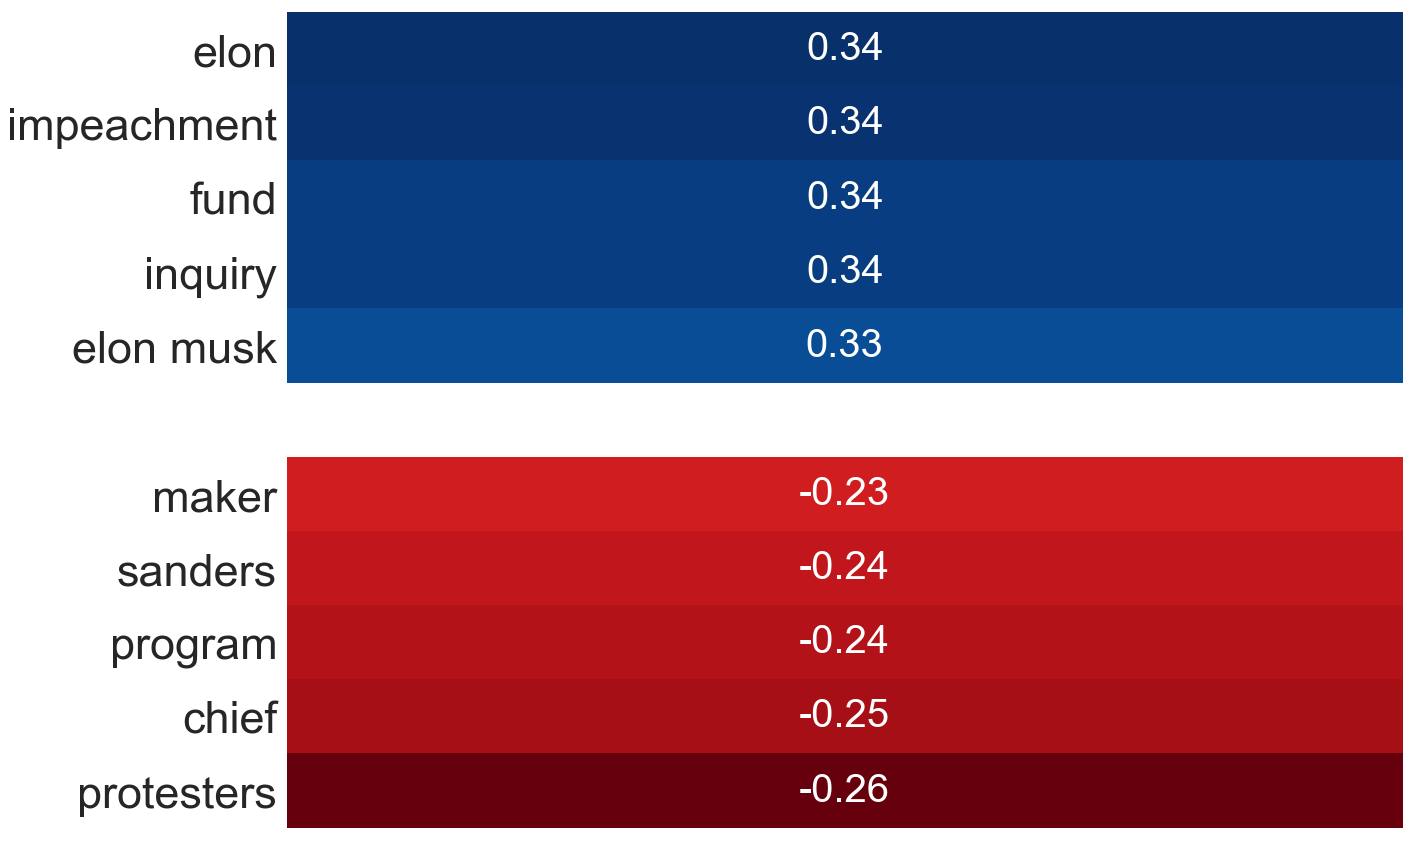

In [44]:
plt.rcParams['figure.figsize'] = (20, 15)
corr=df.corr()['Positive change (open vs. price)']
col_names=corr.dropna().sort_values()[-6:-1].index
col_names=[name.replace(periodicos[periodico],'') for name in col_names]
fig, axs = plt.subplots(2)
axs[0]=sns.heatmap(corr.dropna().sort_values()[-6:-1][::-1].values.reshape(5,1),yticklabels=col_names[::-1],xticklabels='',annot=True,cmap='Blues',center=.3,cbar=False,ax=axs[0],annot_kws={'size':40})
plt.setp( axs[0].yaxis.get_majorticklabels(), rotation=0 )
for tick in axs[0].yaxis.get_major_ticks():
    tick.label.set_fontsize(45)
col_names=corr.dropna().sort_values()[:5].index
col_names=[name.replace(periodicos[periodico],'') for name in col_names]
axs[1]=sns.heatmap(corr.dropna().sort_values()[:5][::-1].values.reshape(5,1),yticklabels=col_names[::-1],xticklabels='',annot=True,cmap='Reds_r',center=-.2,cbar=False,ax=axs[1],annot_kws={'size':40})
rot=plt.yticks(rotation=0,size=45)
fig.savefig('figuras/corr.png')

<center><h3>PCA</h3></center>

**2960** dimensiones a **3** nos dan la siguiente explicación:

In [196]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
sns.set()
cols=df.columns
X=df[cols[:-7]].dropna().values
x = StandardScaler().fit_transform(X)
pca = PCA(n_components=3)
principalComponents = pca.fit_transform(x)
print(pca.explained_variance_)

[187.78238794 125.33804615 115.95373454]


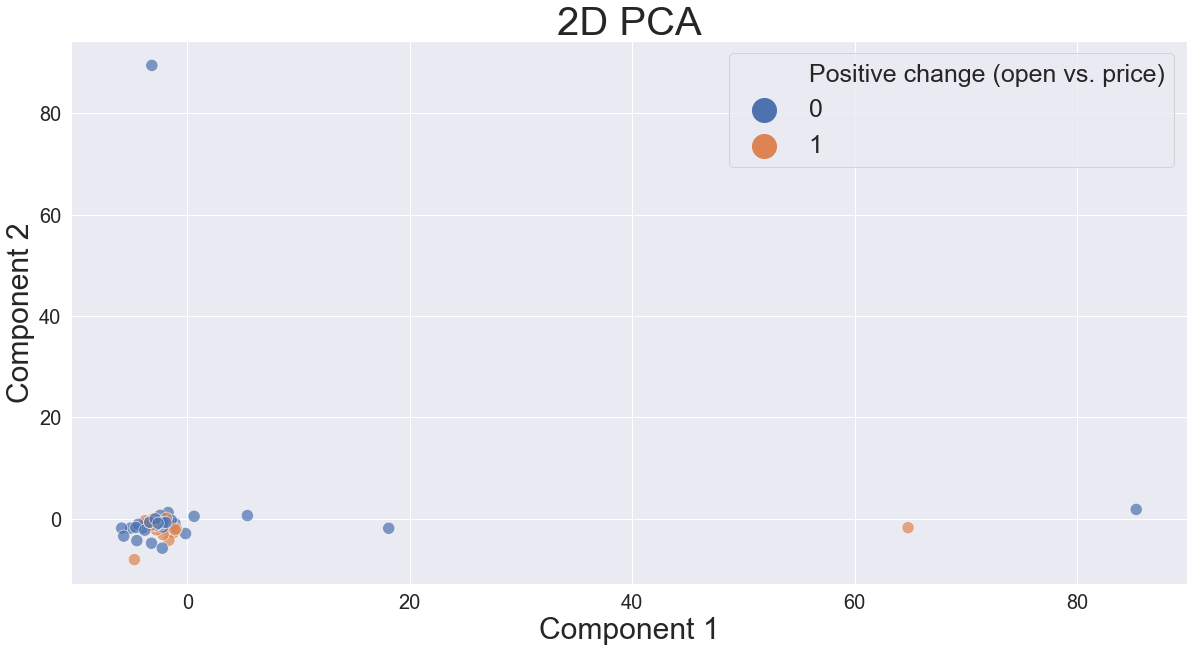

In [480]:
plt.rcParams['figure.figsize'] = (20,10)
ax=sns.scatterplot(x=principalComponents[:,0],y=principalComponents[:,1],hue=df.dropna()['Positive change (open vs. price)'],alpha=.7,s=150)
ax.set_title('2D PCA',size=40)
ax.set_xlabel('Component 1',size =30)
ax.set_ylabel('Component 2',size=30)
plt.yticks(rotation=0,size=20)
for tick in ax.xaxis.get_major_ticks():
    tick.label.set_fontsize(20)
a=plt.legend(prop={'size':25},loc='upper right',markerscale=4)

<center><h2>Modelos predictivos</h2></center>

Recordemos que la variable que nos interesa predecir es **Positive change (open vs. price)**, es decir 2 clases:

* 1 si la diferencia entre price y open fue **positiva**.
* 0 si fue **negativa**.

Cómo se trata de un clasificador binario se intentaron los siguientes modelos:

* **LDA**
* **QDA**
* **Regresión lógistica**
* **Random Forest**

Para entrenarlos se usó el primer **70%** y para probarlos el último **30%** de nuestras observaciones en orden temporal.
<br><br>
<center> <b>
¿Cuál tuvo mejor desempeño?
    </b>   </center>

<center><h3>LDA</h3></center>
 
Encontrar la función líneal que mejor separa nuestros grupos etiquetados pero que al mismo tiempo mantenga la mayor densidad interna para el set de entrenamiento.

La **accuracy** en el set de prueba resultó ser:

In [31]:
X=df[cols[:-7]].dropna().values
y = df.dropna()['Positive change (open vs. price)']


div = int(round(len(X) * 0.29))
# We take the first observations as test and the last as train because the dataset is ordered by timestamp descending.
#X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)
X_test = X[:div]
y_test = y[:div]
X_train = X[div:]
y_train = y[div:]

lda = LinearDiscriminantAnalysis()
lda.fit(X_train, y_train)
colorss = ['navy', 'turquoise']
y_pred=lda.predict(X_test)
accuracy_score(y_test,y_pred)

0.631578947368421

Es decir nuestro modelo predijó correctamente el 63% de las ocasiones con la siguiente **matriz de confusión** en el set de prueba:

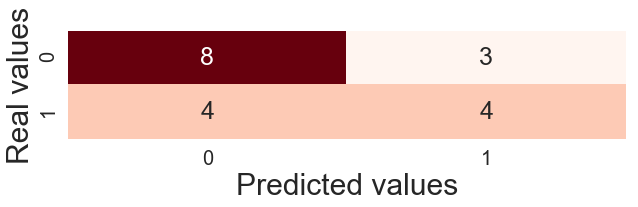

In [32]:
plt.rcParams['figure.figsize'] = (10,2)
cm = confusion_matrix(y_test, y_pred)
ax=sns.heatmap(cm,annot=True,cmap='Reds',fmt='g',xticklabels=['0','1'],yticklabels=['0','1'],cbar=False,annot_kws={'size':25})
ax.set_ylabel('Real values',size=30)
ax.set_xlabel('Predicted values',size=30)
for tick in ax.xaxis.get_major_ticks():
    tick.label.set_fontsize(20)
p=plt.yticks(size=20)

<center><h3>Correlaciones</h3><center>

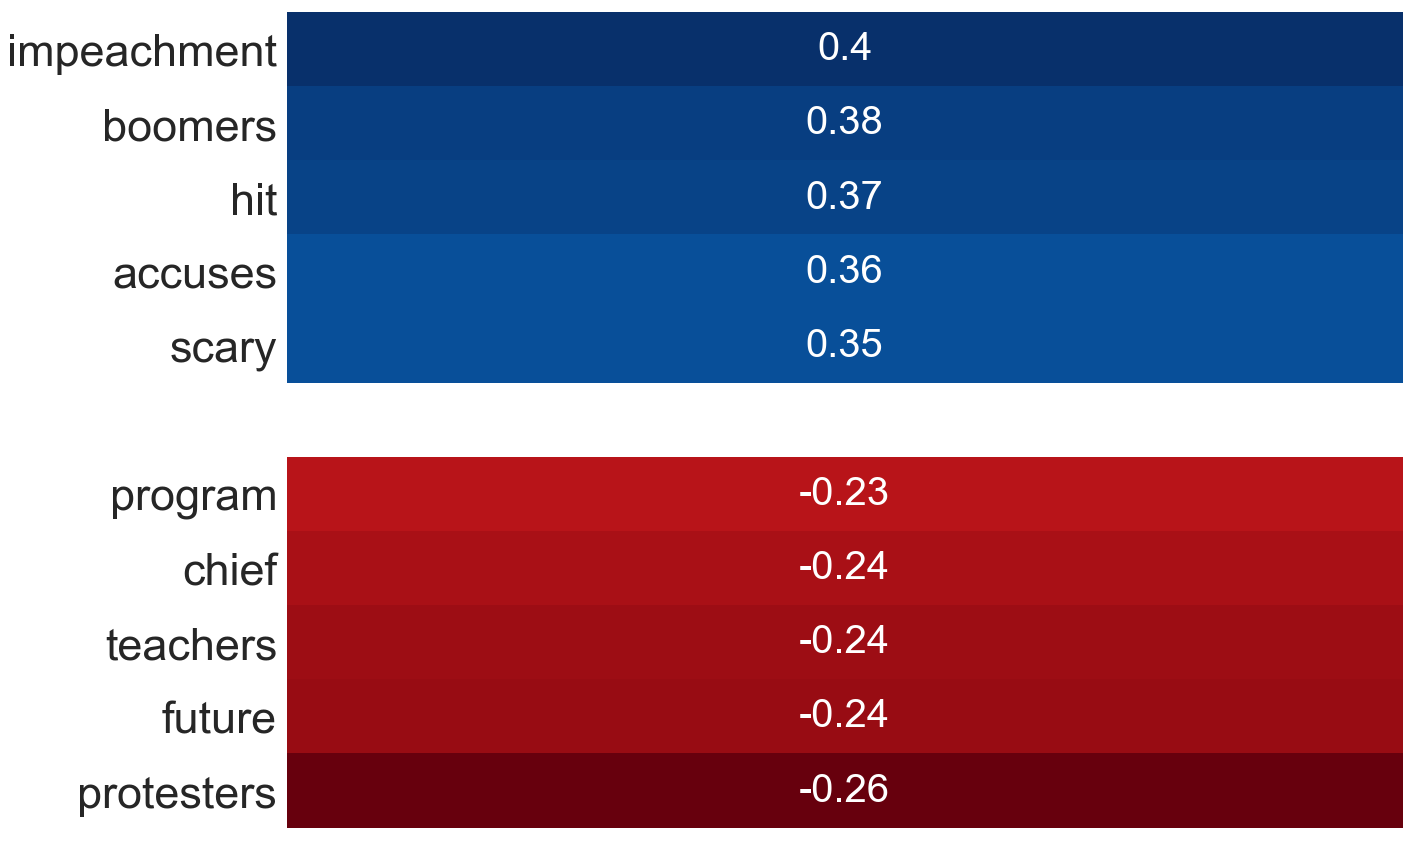

In [34]:
df['lda']=lda.predict(X)
plt.rcParams['figure.figsize'] = (20, 15)
corr=df.corr()['lda']
col_names=corr.dropna().sort_values()[-7:-2].index
col_names=[name.replace(periodicos[periodico],'') for name in col_names]
fig, axs = plt.subplots(2)
axs[0]=sns.heatmap(corr.dropna().sort_values()[-7:-2][::-1].values.reshape(5,1),yticklabels=col_names[::-1],xticklabels='',annot=True,cmap='Blues',center=.2,cbar=False,ax=axs[0],annot_kws={'size':40})
plt.setp( axs[0].yaxis.get_majorticklabels(), rotation=0 )
for tick in axs[0].yaxis.get_major_ticks():
    tick.label.set_fontsize(45)
col_names=corr.dropna().sort_values()[:5].index
col_names=[name.replace(periodicos[periodico],'') for name in col_names]
axs[1]=sns.heatmap(corr.dropna().sort_values()[:5][::-1].values.reshape(5,1),yticklabels=col_names[::-1],xticklabels='',annot=True,cmap='Reds_r',center=-.2,cbar=False,ax=axs[1],annot_kws={'size':40})
rot=plt.yticks(rotation=0,size=45)
fig.savefig('figuras/corrLDA.png')

<center><h3>Mapa territorial</h3><center>

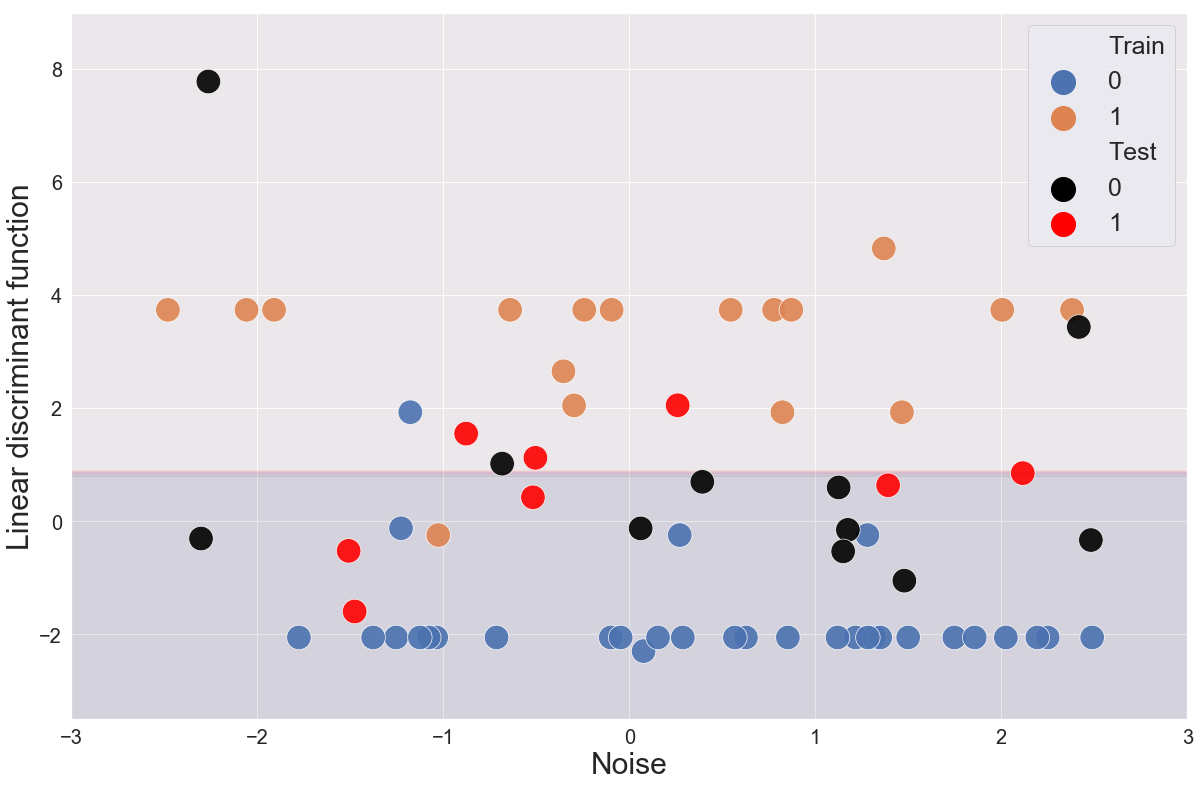

In [11]:
plt.rcParams['figure.figsize'] = (20,13)
X_lda=lda.transform(X)
X_test_lda=X_lda[:div]
X_train_lda=X_lda[div:]
obs=X_train_lda.shape[0]
from sklearn import datasets

from matplotlib import pyplot as plt
import matplotlib.colors as colors
from mpl_toolkits.mplot3d import Axes3D
from mpl_toolkits import mplot3d
from sklearn import linear_model, datasets
import itertools

X_lda=lda.transform(X)
X_test_lda=X_lda[:div]
X_train_lda=X_lda[div:]
obs=X_train_lda.shape[0]
fig,ax=plt.subplots()
train=y_train.to_frame()
train.rename(columns={'Positive change (open vs. price)':'Train'},inplace=True)
test=y_test.to_frame()
test.rename(columns={'Positive change (open vs. price)':'Test'},inplace=True)
sns.scatterplot(np.zeros(obs)+np.random.random(obs)*5-2.5,(X_train_lda.reshape(obs)),hue=train['Train'],ax=ax,s=600,alpha=.9,zorder=20)

sns.scatterplot(np.zeros(div)+np.random.random(div)*5-2.5,(X_test_lda.reshape(div)),palette=['Black','Red'],hue=test['Test'],ax=ax,s=600,alpha=.9,zorder=20)


lda2 = LinearDiscriminantAnalysis(n_components=2)
X_data = X_train_lda
y_labels = y_train
lda2.fit(X_data,y_labels)





# Our 2-dimensional distribution will be over variables X and Y
N = 100
Xs = np.linspace(-3,3, N)
Y = np.linspace(-3.5, 9, N)
Xs, Y = np.meshgrid(Xs, Y)



my_norm = colors.Normalize(vmin=-1.,vmax=1.)


#Computing the predicted class function for each value on the grid
zz = np.array(  [lda2.predict(yy) 
                     for xx, yy in zip(np.ravel(Xs),np.ravel(Y)) ] )
    
#Reshaping the predicted class into the meshgrid shape
Z = zz.reshape(Xs.shape)
#Plot the filled and boundary contours
ax.contourf( Xs, Y, Z,alpha = .1)
ax.contour( Xs, Y, Z,alpha = .1)
# Addd axis and title
ax.set_xlabel('Noise',size=30)
ax.set_ylabel('Linear discriminant function',size=30)

plt.yticks(size=20)
for tick in ax.xaxis.get_major_ticks():
    tick.label.set_fontsize(20)
a=plt.legend(prop={'size':25},loc='upper right',markerscale=4)
plt.show()

<center><h2>Simulación de portafolios</h2></center>

Como primer paso observamos si el precio de Bitcoin aumentará y disminuirá en el próximo dia, adicionalmente observamos cuál es la evolución de un **portafolio dinámico** con un capital de MXN$ 100,000. 

Nuestro portafolio dinámico funciona de la siguiente manera. La posición, **larga** o **corta**, la definimos así:

$$Pos_{t+1} = 1 \text{ if the prediction is 1}.$$
<br>
$$\text{  } Pos_{t+1} = -1 \text{ if the prediction is 0}.$$

Por lo tanto, nuestro capital cambia de la siguiente forma:

$$Capital_{t+1} = Capital_{t} * (1+yield_{t+1} * Pos_{t+1})$$
<br>
$$\text{where } yield_{t+1} = \frac{price_{t+1}}{\text{open}_{t+1}} - 1$$



<center><h3>Supuestos</h3></center>

Para este ejercicio asumimos lo siguiente:

1. Mercados **perfectos**.
2. Se puede tomar posiciones **cortas** sin límite.
3. **Cero** costo por transacciones.
4. Apalancamiento de 1 para ambas posiciones.

<center><h3>Rendimientos y predicciones</h3><center>

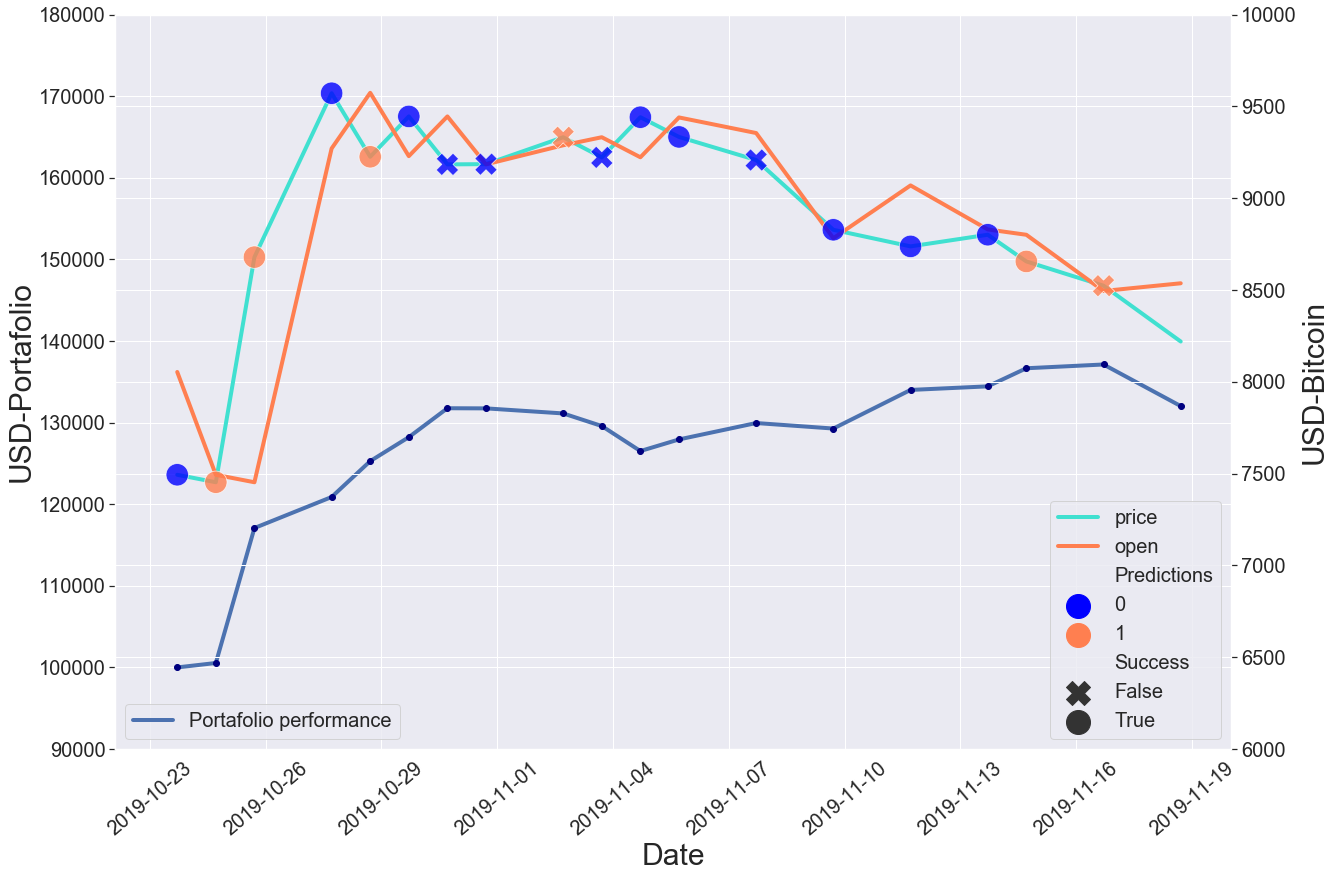

In [14]:

plt.rcParams['figure.figsize'] = (20,15)
capital=100000
c=[]
c.append(capital)
sns.set( rc={"lines.linewidth": 4})
for i,pred in enumerate(y_pred[::-1]):
    if pred==0:
        pos=-1
    else:
        pos=1
    capital=capital*(1+(df['price'].iloc[div-i-2]/df['open'].iloc[div-i-2]-1)*pos)
    c.append(capital)
fig,ax=plt.subplots()
dates=df['date'].iloc[:div][::-1]

plt.plot_date(dates,c[:-1],'',label='Portafolio performance')
plt.plot_date(dates,c[:-1],color='Navy')


ax.set_ylabel('USD-Portafolio', size = 30)
ax.set_xlabel('Date', size = 30)
for tick in ax.xaxis.get_major_ticks():
    tick.label.set_fontsize(20) 
    tick.label.set_rotation(40)
a=ax.set_ylim([90000, 180000])

ax2=ax.twinx()




ax2=df[:div].plot(x='date',y=['price','open'],logy=False,color=['turquoise','coral'],c='pred',ax=ax2)
df1=df[:div]
df1['Predictions']=y_pred
df1['Success']=y_pred==y_test
ax2=sns.scatterplot(x='date',y='price',hue='Predictions',palette=['Blue','Coral'],data=df1[1:],s=500,zorder=30,alpha=.8,ax=ax2,style='Success',markers=['X','o'])








ax.legend(prop={'size':20},loc='lower left')



ax2.set_ylabel('USD-Bitcoin', size = 30)



a=plt.legend(prop={'size':20},loc='lower right',markerscale=4)
for tick in ax.yaxis.get_major_ticks():
    tick.label.set_fontsize(20)
plt.yticks(size=20)   
a=ax2.set_ylim([6000, 10000])



<center><h3>Resumen del portafolio</h3></center>

1. Veamos que la evolución del capital es **creciente**.
2. El **rendimiento** es de 30%.
3. A través de **LDA** podemos predecir correctamente más del 60% de las observaciones.
4. Más del 50% de predicciones correctas **no** asegura rendimiento **positivo**. 

<center><h2>Conclusiones</h2></center>

El modelo con mejor predicción sobre la base de datos de prueba fue **LDA** con un 63% de **accuracy**.

Intentamos un modelo **PCA** para reducir la dimensión pero los resultados fueron poco concluyentes.

Confirmamos que hay una relación entre el movimiento de Bitcoin y el análisis de noticias. Además, se puede monetizar esta relación con el uso de modelos predictivos, ya que el rendimiento sobre un intervalo de un mes es de 30%, aunque este también involucra un riesgo alto. 



<center><h3>Posibles pasos futuros</h3></center>


1. Incluir mayor **información** a través de añadir otros medios como Bloomberg, etc.
2. Refinar el modelo a través del uso de **series de tiempo**.
3. Algoritmo dinámico que se vuelva a entrenar cada día con mayor información y pueda tomar decisiones de inversión en **tiempo real**.
4. **Portafolio dinámico** con **análisis de riesgo**.